# Building an Image Enhancer using Fourier Transform
In this project, students are expected to explore the Fourier Transform to enhance the image such as blurring, sharpening, edge detection, noise suppression, etc.

Students are required to build the enhancer module using Fourier Transform with the following functionality:
1.	Blurring using low-pass filter
2.	Sharpening using high pass filter
3.	Edge Detection
4.	Noise suppression

Students are required to create a python class, and can implement these functionalities as different methods.

Steps that can be followed ( Please note these are only recommended steps, students are free to use other steps) :
1.	Convert Image from spatial domain to frequency domain
2.	Apply appropriate filter/processing on frequency domain to achieve the task.
3.	Convert back to the spatial domain from the frequency domain.
4.	Apply the required post-processing to improve the results.

### But, What is Fourier Transform really ?
In the simplest terms, a fourier transform helps in breaking down a incoming signal into its building blocks. So for example consider a signal f(x) having made by superimposing two or more sinusoidal functions with different frequencies. Now by just looking at the plot of f(x) you wont be able to decide what or how many original functions were used to form f(x).

This is where Fourier does its magic. By passing f(x) through fourier transformer, we get a new function F(x). What's sweet about F(x) is that it a plot of frequencies that made f(x) originally. So just by looking at F(x) you can tell what original frequencies were that were used to form f(x). In doing so Fourier transform can reveal important characteristics of a signal, namely, its frequency components.

## Using Fast Fourier Transformation

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
from skimage import io

### 1. fft2 - fft.fft2(a, s=None, axes=(- 2, - 1), norm=None)

This function computes the n-dimensional discrete Fourier Transform over any axes in an M-dimensional array by means of the Fast Fourier Transform (FFT). By default, the transform is computed over the last two axes of the input array, i.e., a 2-dimensional FFT.]

### 2. fftshift - fft.fftshift(x, axes=None)

Shift the zero-frequency component to the center of the spectrum.

This function swaps half-spaces for all axes listed (defaults to all). Note that y[0] is the Nyquist component only if len(x) is even.

### 3. ifftshift - fft.ifftshift(x, axes=None)

The inverse of fftshift. Although identical for even-length x, the functions differ by one sample for odd-length x.

### 4. ifft2 - fft.ifft2(a, s=None, axes=(- 2, - 1), norm=None)

This function computes the inverse of the 2-dimensional discrete Fourier Transform over any number of axes in an M-dimensional array by means of the Fast Fourier Transform (FFT). In other words, ifft2(fft2(a)) == a to within numerical accuracy. By default, the inverse transform is computed over the last two axes of the input array.

In [79]:
#img = io.imread('squirrel-img.jpeg')

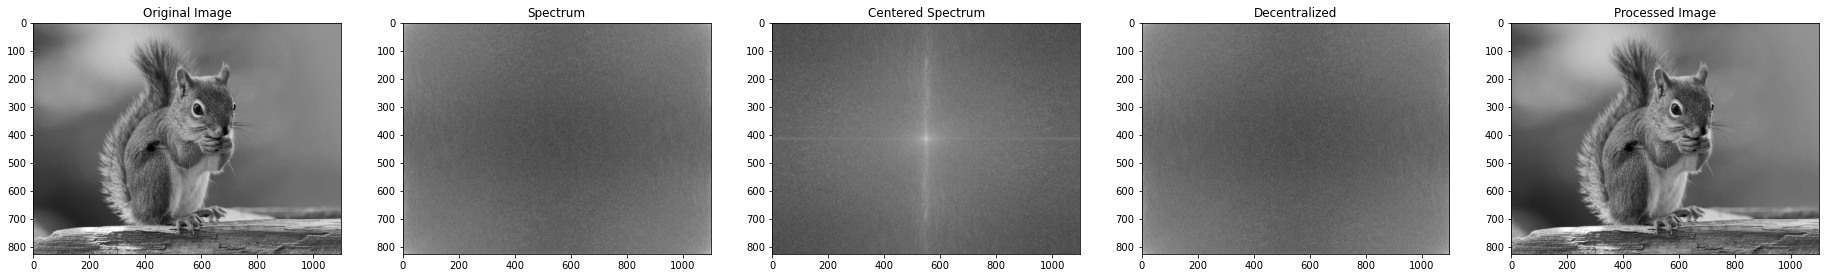

In [80]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread('squirrel-img.jpeg', 0)
plt.subplot(151), plt.imshow(img, 'gray'), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)),'gray'), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)),'gray'), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)),'gray'), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img),'gray'), plt.title("Processed Image")

plt.show()

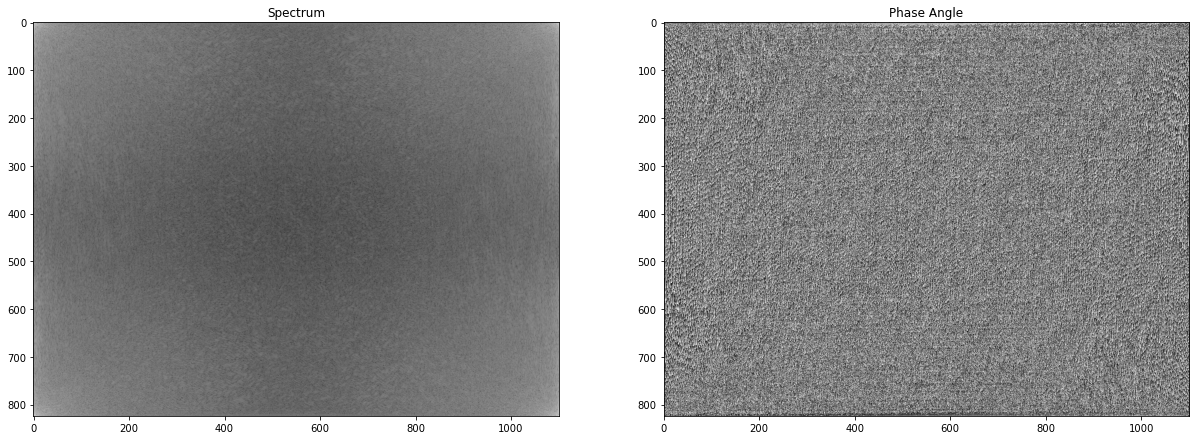

In [81]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [82]:
#comment

# def distance(point1,point2):
#     return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# def idealFilterLP(D0,imgShape):
#     base = np.zeros(imgShape[:2])
#     rows, cols = imgShape[:2]
#     center = (rows/2,cols/2)
#     for x in range(cols):
#         for y in range(rows):
#             if distance((y,x),center) < D0:
#                 base[y,x] = 1
#     return base

# def idealFilterHP(D0,imgShape):
#     base = np.ones(imgShape[:2])
#     rows, cols = imgShape[:2]
#     center = (rows/2,cols/2)
#     for x in range(cols):
#         for y in range(rows):
#             if distance((y,x),center) < D0:
#                 base[y,x] = 0
#     return base

# def butterworthLP(D0,imgShape,n):
#     base = np.zeros(imgShape[:2])
#     rows, cols = imgShape[:2]
#     center = (rows/2,cols/2)
#     for x in range(cols):
#         for y in range(rows):
#             base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
#     return base

# def butterworthHP(D0,imgShape,n):
#     base = np.zeros(imgShape[:2])
#     rows, cols = imgShape[:2]
#     center = (rows/2,cols/2)
#     for x in range(cols):
#         for y in range(rows):
#             base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
#     return base

# def gaussianLP(D0,imgShape):
#     base = np.zeros(imgShape[:2])
#     rows, cols = imgShape[:2]
#     center = (rows/2,cols/2)
#     for x in range(cols):
#         for y in range(rows):
#             base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
#     return base

# def gaussianHP(D0,imgShape):
#     base = np.zeros(imgShape[:2])
#     rows, cols = imgShape[:2]
#     center = (rows/2,cols/2)
#     for x in range(cols):
#         for y in range(rows):
#             base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
#     return base

## 1. Effect of Blurring Using Low Pass Filter

Low pass filter is a filter that only allow low frequencies to pass through. Low frequencies in images mean pixel values that are changing slowly. For example, smooth area with slightly color changing in the image such as the center of new blank white paper is considered as a low frequency content.

Since the output of low pass filter only allow low frequencies to pass through, the high frequencies contents such as noises are blocked which make processed image has less noisy pixels. Therefore, low pass filter is highly used to remove the noises in images.

In [83]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

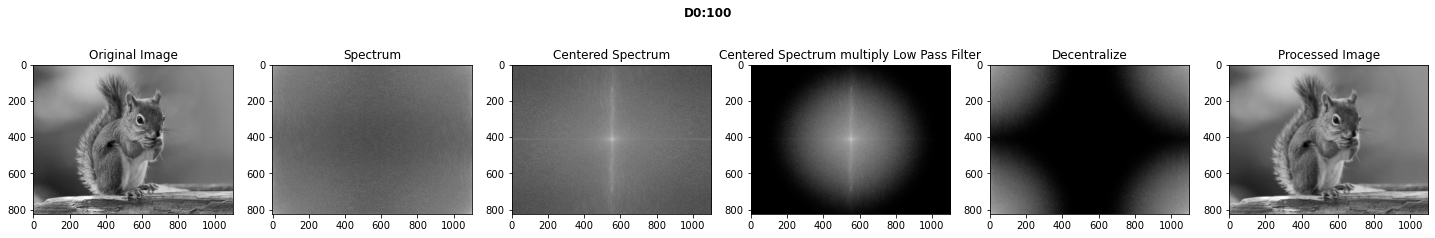

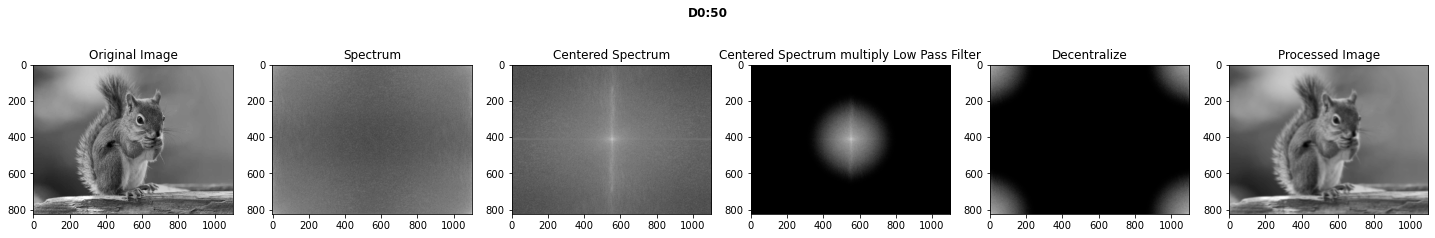

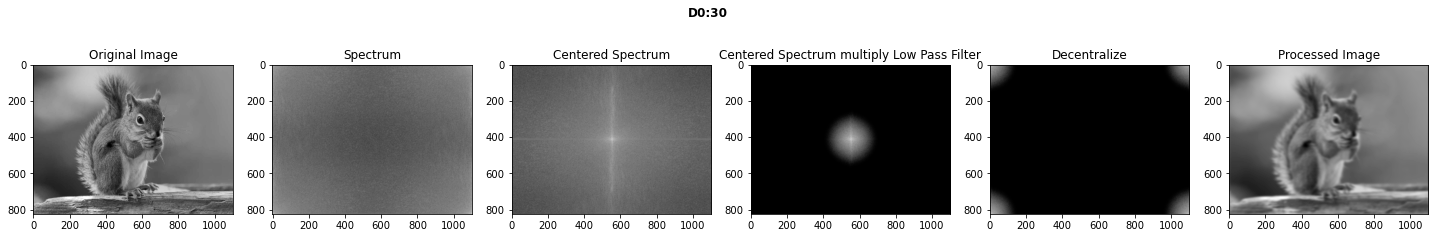

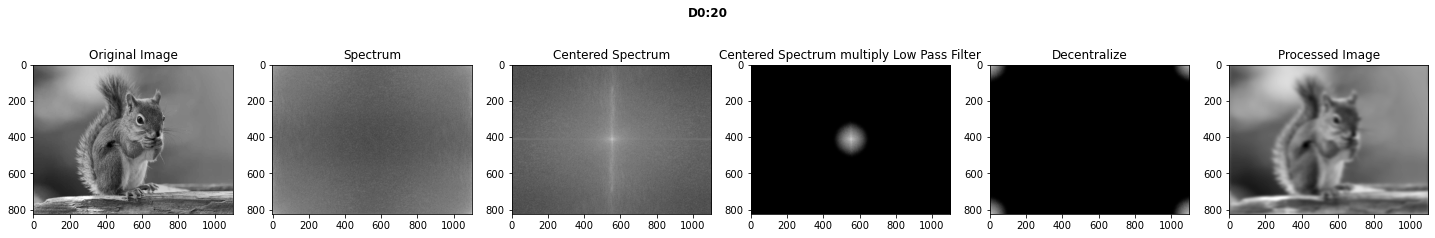

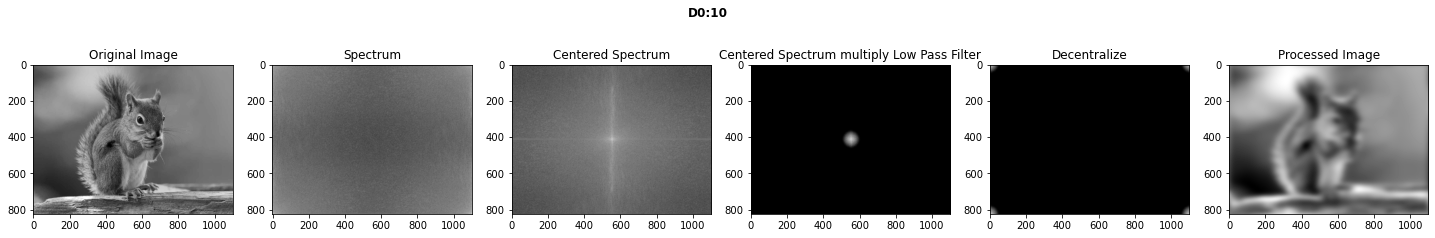

In [84]:
def try_d0s_lp(d0):
    plt.figure(figsize=(25, 5), constrained_layout=False)


    plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
    plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
    plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    LowPassCenter = center * gaussianLP(d0,img.shape)
    plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

    LowPass = np.fft.ifftshift(LowPassCenter)
    plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

    inverse_LowPass = np.fft.ifft2(LowPass)
    plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

    plt.suptitle("D0:"+str(d0),fontweight="bold")
    plt.subplots_adjust(top=1.1)
    plt.show()
    
    
for i in [100,50,30,20,10]:
    try_d0s_lp(i)

## 2. Compare the effect of the main high-pass filters (sharpening)

High Pass filter, on the contrary, is a filter that only allow high frequencies to pass through. High frequencies in images mean pixel values that are changing dramatically. For example, Edge areas in the image with huge color changing such as the edge between two overlap white and black paper is consider as the high frequency content.

The output from high pass filter captures the edges in image which could be used to sharpen the original image with proper overlap calculation. This will enhance sharpness in original image making edges more clear.

In [85]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

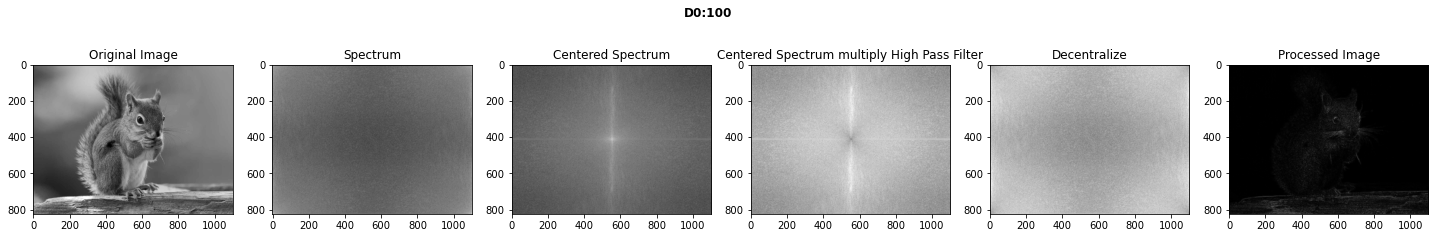

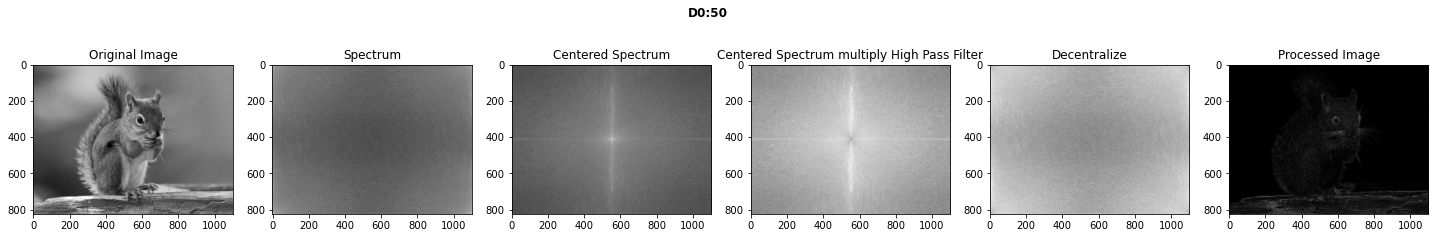

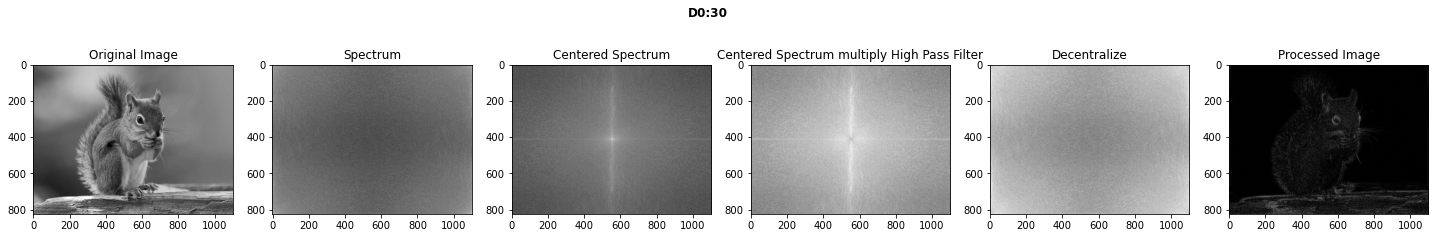

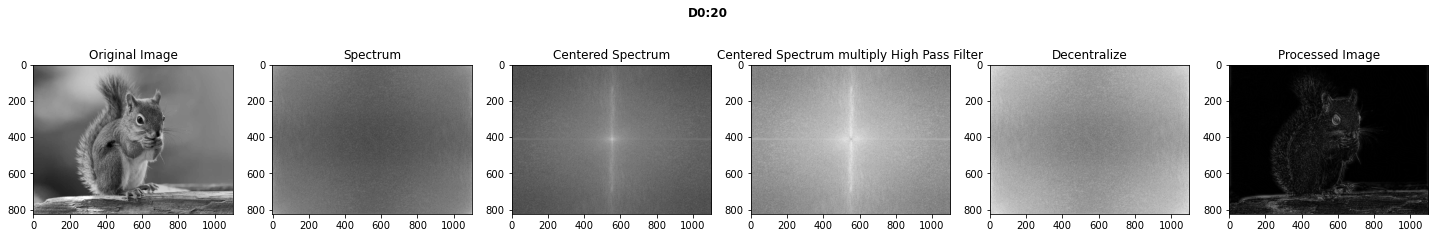

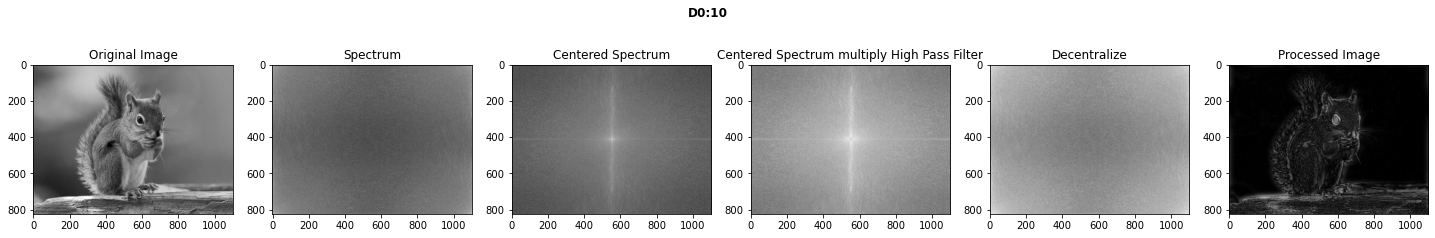

In [86]:
def try_hp(d0):
    plt.figure(figsize=(25, 5), constrained_layout=False)


    plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
    plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
    plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    HighPassCenter = center * gaussianHP(d0,img.shape)
    plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

    HighPass = np.fft.ifftshift(HighPassCenter)
    plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

    inverse_HighPass = np.fft.ifft2(HighPass)
    plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

    plt.suptitle("D0:"+str(d0),fontweight="bold")
    plt.subplots_adjust(top=1.1)
    plt.show()
    
    
for i in [100,50,30,20,10]:
    try_hp(i)

## Image Sharpening in frequency domain

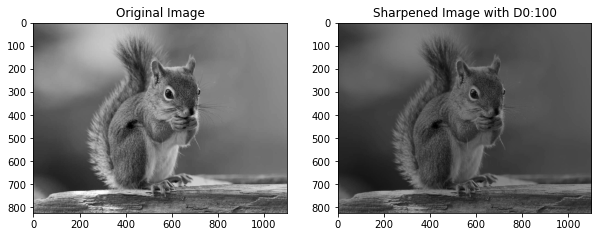

In [69]:
d0 = 100

# perform FFT
original = np.fft.fft2(img)
# get spectrum
center = np.fft.fftshift(original)
# center spectrum for high pass
HighPassCenter = center * gaussianHP(d0,img.shape)
# perform high pass
HighPass = np.fft.ifftshift(HighPassCenter)
# reverse FFT -> IFFT
inverse_HighPass = np.fft.ifft2(HighPass)
# add filter to original image
sharpened = img+np.abs(inverse_HighPass)


plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, "gray")
plt.title("Original Image")

plt.subplot(122)
plt.imshow(sharpened,cmap="gray")
plt.title("Sharpened Image with D0:"+str(d0))
plt.show()

## 3. Image Edge Detection

/var/folders/8r/jjs1zg7938x9bj7_lcjvjt000000gn/T/ipykernel_87894/2687341804.py:21: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


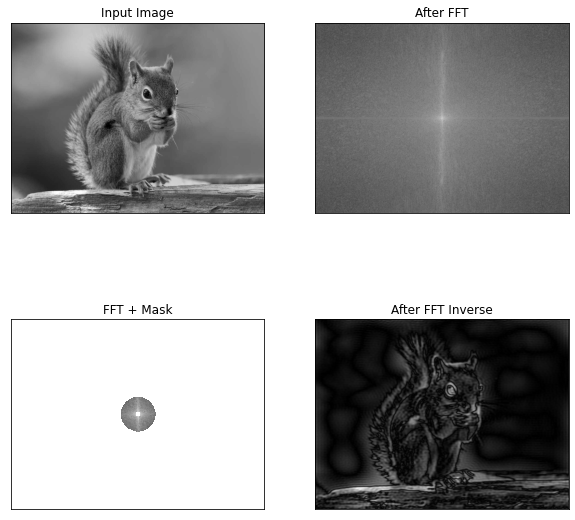

In [96]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)  # center

# Concentric BPF mask,with are between the two circles as one's, rest all zero's.
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 5
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()

As can be seen, application of high pass filter, blocked all the low frequencies in the center and allowed only the high frequencies to pass through. Now since edges are usually made of low frequencies, that's we see in the resultant image.

### Better edge detection in an image using a Band Pass Filter
So far we've seen, a High pass filter and a Low Pass filter. We employed HPF for edge detection before. Details of which can be found in my previous post Edge detection in images using Fourier Transform .

A Band pass filter is the combination of both HPF and LPF. It strives to achieve a balance in not throwing away all of the low frequencies as well as all of the high frequencies. Or in other words, it only allows a range of frequencies to pass.


## 4. Noise Suppression

Add some periodic noise in the frequential domain and apply notch filter to remove it

In [108]:
# # https://itqna.net/questions/1742/how-generate-noise-image-using-python
# img = cv2.imread('squirrel-img.jpeg', 0)

# def add_periodic(img):
#     orig = img
#     sh = orig.shape[0], orig.shape[1]
#     noise = np.zeros(sh, dtype='float64')

#     X, Y = np.meshgrid(range(0, sh[0]), range(0, sh[1]))

#     A = 40
#     u0 = 45
#     v0 = 50

#     noise += A*np.sin(X*u0 + Y*v0)

#     A = -18
#     u0 = -45
#     v0 = 50

#     noise += A*np.sin(X*u0 + Y*v0)

#     noiseada = orig+noise
#     return(noiseada)

# periodic = add_periodic(img).astype(int)


# plt.figure(figsize=(6,6))
# plt.imshow(periodic,cmap="gray")
# plt.title("Periodic Noise")
# plt.show()

/var/folders/8r/jjs1zg7938x9bj7_lcjvjt000000gn/T/ipykernel_87894/2728180944.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)


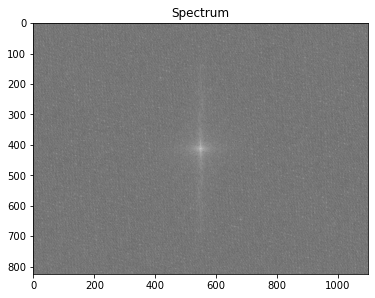

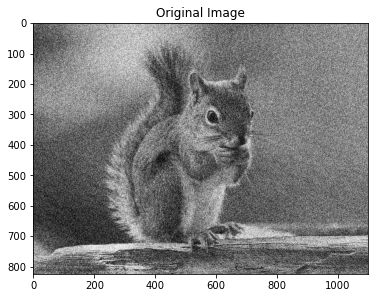

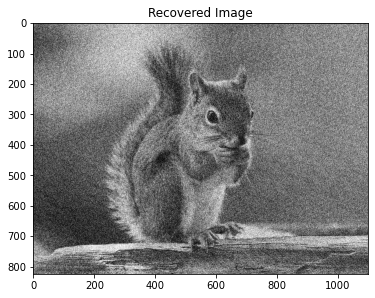

In [124]:
img =  cv2.imread('squirrel-blur.jpeg', 0)
from scipy import fftpack
import numpy.fft as fp
w = 10
h = 10

im = img
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift(F1)
for i in range(60, w, 135):
    for j in range(100, h, 200):
        if not (i == 330 and j == 500):
            F2[i-10:i+10, j-10:j+10] = 0
    for i in range(0, w, 135):
        for j in range(200, h, 200):
            if not (i == 330 and j == 500):
                F2[max(0,i-15):min(w,i+15), max(0,j-15):min(h,j+15)] = 0

plt.figure(figsize=(6,6))
plt.title("Spectrum")
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img, 'gray'), plt.title("Original Image")

im1 = fp.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(6,6))
plt.title("Recovered Image")
plt.imshow(im1, cmap='gray')
plt.show()